# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Rizky Sya'ban
- **Email:** mrsyaban99@gmail.com
- **ID Dicoding:** mrsyaban

## Menentukan Pertanyaan Bisnis

- Bagaimana hari kerja mempengaruhi jumlah pengguna rental sepeda ?
- Bagaimana pengaruh cuaca dan kondisi lingkungan terhadap penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy import stats
import math
import warnings

# Suppress warning
warnings.filterwarnings("ignore", category=FutureWarning)

## Data Wrangling

### Gathering Data

In [2]:
# Load the datasets
hour_df = pd.read_csv('/kaggle/input/bike-sharing-dataset/hour.csv')
day_df = pd.read_csv('/kaggle/input/bike-sharing-dataset/day.csv')

In [3]:
hour_df.info()
hour_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
day_df.info()
day_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Change type of data
dteday need to be of datatype 'datetime'.

In [5]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.set_index('dteday', inplace=True)

hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.set_index('dteday', inplace=True)

**Insight:**
- 
- hour.csv memiliki 17.379 instances dan 17 kolom
- day.csv memiliki 731 instances dan 16 kolom
- dataset hour.csv lebih detail daripada day.csv karena mencatat data setiap jamnya, sehingga dataset tersebut memiliki jauh lebih banyak instance daripada day.csv
- data hanya mencakup 2 tahun yaitu 2011 dan 2012
- semua tipe data telah sesuai dengan isi datanya (tidak ada data yang seharusnya numerik tapi memiliki tipe object)
- data memberikan data jenis pengguna yang dapat dimanfaatkan untuk analisis segmentasi pengguna
- kolom `temp`, `atemp`, `hum`, dan `windspeed` telah dinormalisasi, sehingga data yang ditampilkan bukan skala aslinya
- kolom `season`, `weathersit`, `weekday`, `workingday`, dan  `holiday` adalah data kategorikal yang telah di encoding
- kolom `temp`, `atemp`, `hum`, `windspeed`, `casual`, `registered`, dan `cnt` adalah data numerikal
- kolom `year` adalah data numerikal namun telah diencoding menjadi 0 dan 1 (0: 2011, 1:2012)

### Assessing Data

#### Duplicate Value

In [6]:
hour_df.duplicated().sum()

0

In [7]:
day_df.duplicated().sum()

0

#### Missing Value

In [8]:
hour_df.isna().sum()

instant       0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
day_df.isna().sum()

instant       0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Outlier

In [10]:
num_columns = ["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]
cat_columns = ["season", "yr", "mnth", "holiday", "weekday", "workingday"]

In [11]:
import pandas as pd

def count_outliers(df, columns):
    outlier_percentages = {}
    total_rows = len(df)
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = len(df[(df[col] < lower_bound) | (df[col] > upper_bound)])
        outlier_percentages[col] = (outliers / total_rows) * 100  # Calculate percentage
    return outlier_percentages

# Counting outliers as percentages
hour_outlier_percentages = count_outliers(hour_df, num_columns)
day_outlier_percentages = count_outliers(day_df, num_columns)

print("Percentage of Outliers in Hour Dataset:")
for col, percentage in hour_outlier_percentages.items():
    print(f"{col}: {percentage:.2f}%")

print("\nPercentage of Outliers in Day Dataset:")
for col, percentage in day_outlier_percentages.items():
    print(f"{col}: {percentage:.2f}%")


Percentage of Outliers in Hour Dataset:
temp: 0.00%
atemp: 0.00%
hum: 0.13%
windspeed: 1.97%
casual: 6.86%
registered: 3.91%
cnt: 2.91%

Percentage of Outliers in Day Dataset:
temp: 0.00%
atemp: 0.00%
hum: 0.27%
windspeed: 1.78%
casual: 6.02%
registered: 0.00%
cnt: 0.00%


#### Invalid Value

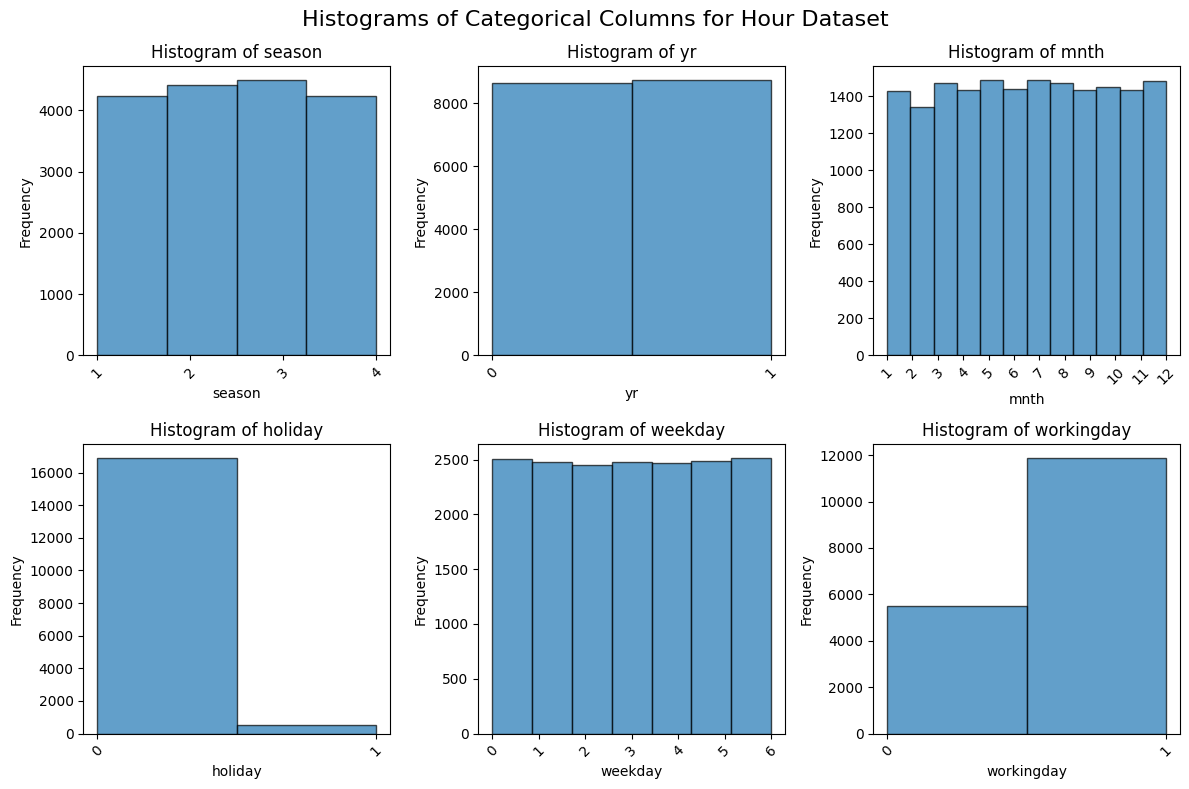

In [12]:
# Show the number of each value on categorical columns 
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

axes = axes.flatten()

# Plot histogram for each column
for i, col in enumerate(cat_columns):
    unique_values = hour_df[col].unique()  # Get unique values for the column
    axes[i].hist(hour_df[col], bins=len(unique_values), edgecolor='black', alpha=0.7)
    axes[i].set_title(f"Histogram of {col}")
    axes[i].set_xticks(unique_values)  # Set x-axis ticks to unique values
    axes[i].set_xticklabels(unique_values, rotation=45)  # Rotate labels for better readability
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Show the figure
fig.suptitle("Histograms of Categorical Columns for Hour Dataset", fontsize=16)
plt.tight_layout()
plt.show()

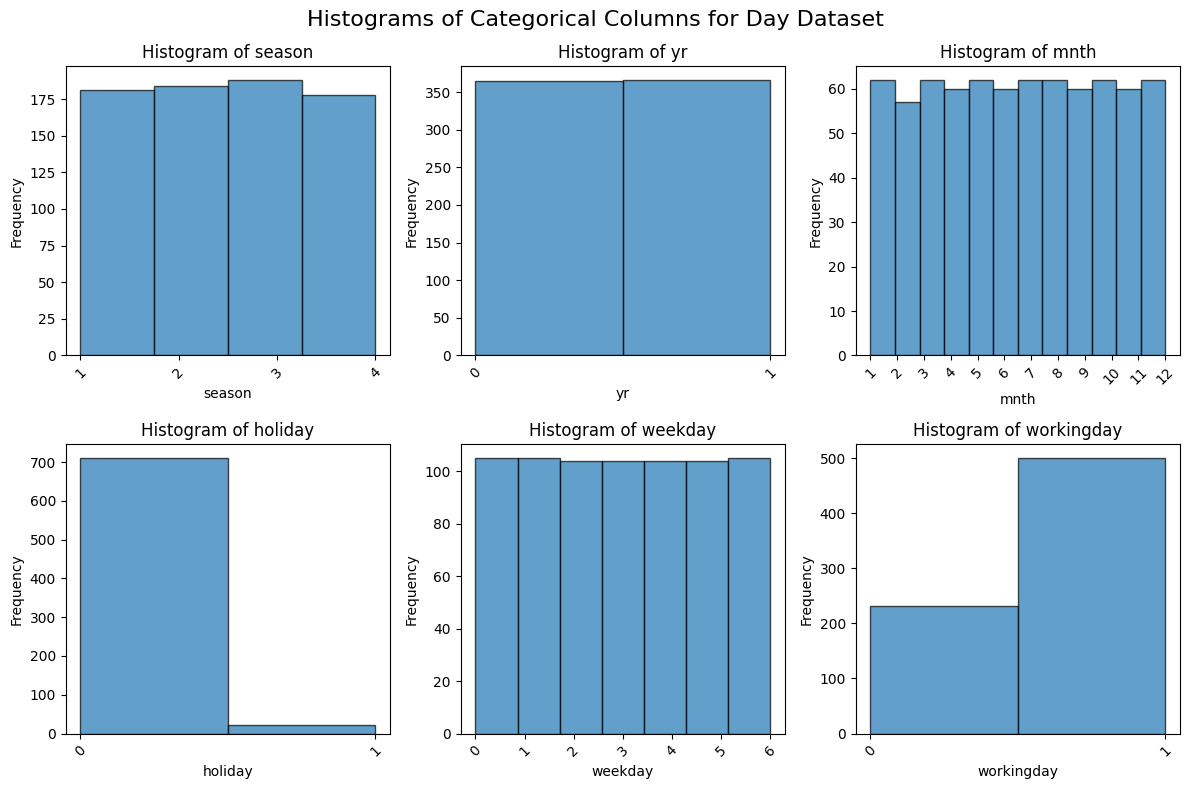

In [13]:
# Show the number of each value on categorical columns 
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

axes = axes.flatten()

# Plot histogram for each column
for i, col in enumerate(cat_columns):
    unique_values = day_df[col].unique()  # Get unique values for the column
    axes[i].hist(day_df[col], bins=len(unique_values), edgecolor='black', alpha=0.7)
    axes[i].set_title(f"Histogram of {col}")
    axes[i].set_xticks(unique_values)  # Set x-axis ticks to unique values
    axes[i].set_xticklabels(unique_values, rotation=45)  # Rotate labels for better readability
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Show the figure
fig.suptitle("Histograms of Categorical Columns for Day Dataset", fontsize=16)
plt.tight_layout()
plt.show()

**Insight:**
- Tidak ada data yang duplikat ataupun hilang (missing/NaN/Null) di dataset hour ataupun dataset day
- Tidak ada data yang invalid di dataset hour maupun dataset day (misal: nilai holiday diluar 0 dan 1, dsb.)
- Terdapat cukup banyak outlier di kolom `windspeed` pada dataset `hour` maupun `day`, yang berarti terdapat  kecepatan angin yang ekstrim pada beberapa waktu peminjaman sepeda
- Terdapat sangat banyak outlier di kolom `casual` pada dataset `hour` maupun `day`, yang berarti terdapat beberapa waktu dimana jumlah casual user menjadi sangat banyak atau sangat sedikit dari biasanya
- Terdapat sangat banyak outlier di kolom `registered` pada dataset `hour`, yang berarti pada jam-jam tertentu  registered user sangat sedikit atau sangat banyak merental sepeda
- Terdapat cukup banyak outlier di kolom `cnt` pada dataset `hour`, yang berarti pada jam-jam tertentu terdapat angka peminjaman yang ekstrim (sangat banyak atau sangat sedikit dari biasanya)
- Data pada hari tidak libur jauh lebih banyak dibandingkan data pada hari libur

### Cleaning Data

#### Outlier Handling

In [14]:
Q1 = hour_df['cnt'].quantile(0.25)
Q3 = hour_df['cnt'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataframe to drop outliers
hour_df_clean = hour_df[(hour_df['cnt'] >= lower_bound) & (hour_df['cnt'] <= upper_bound)]

**Insight:**
- outlier pada kolom `cnt`, `casual`, dan `registered` didrop agar tidak menggangu nilai mean ataupun parameter statistik lainnya, dan drop dipilih karena persentasenya cukup kecil dibandingkan dengan total keseluruhan data

## Exploratory Data Analysis (EDA)

### Statistics Parameters

In [15]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [16]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Data Distribution

#### hour.csv

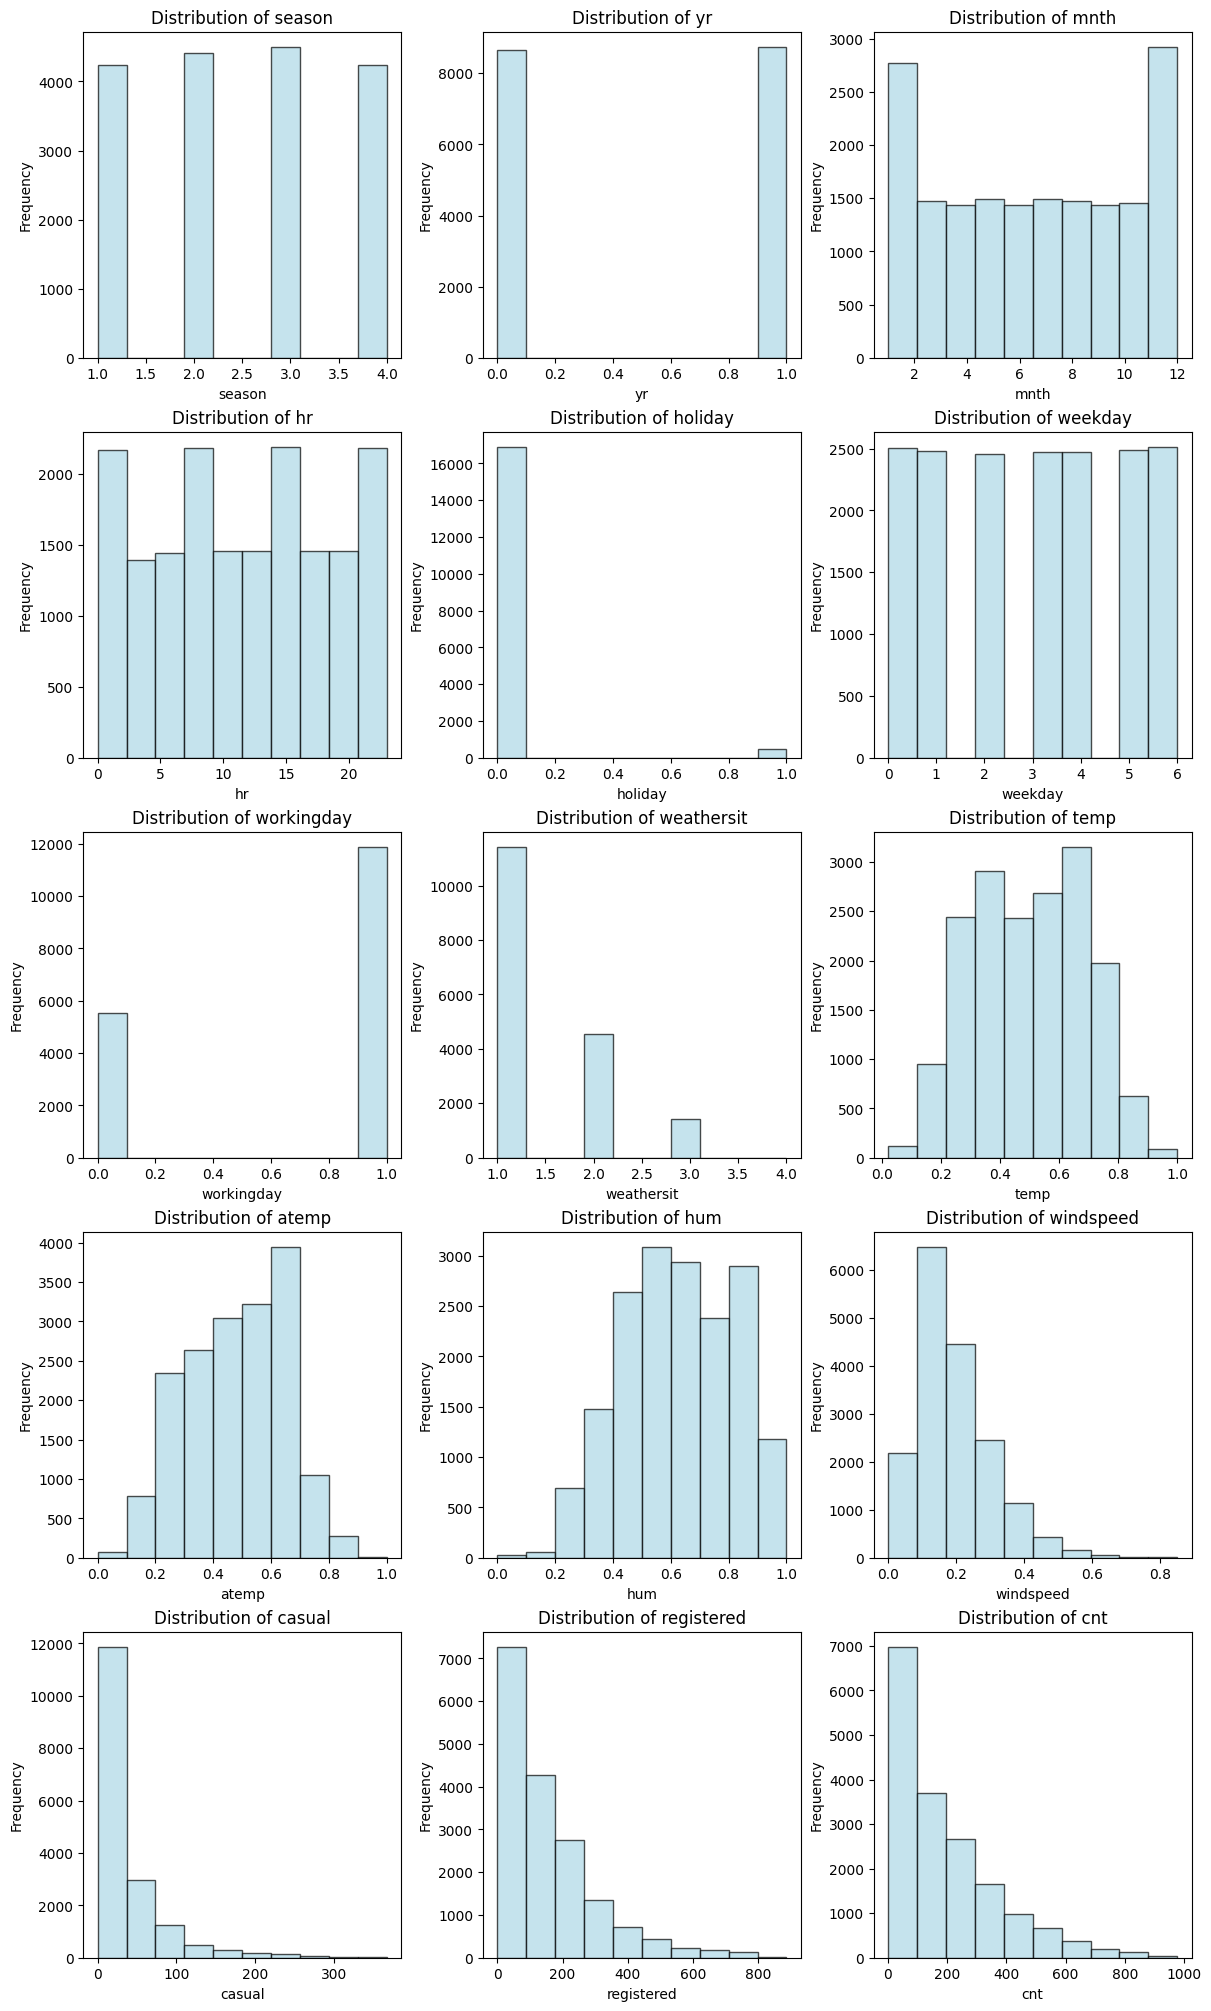

In [32]:
# Exclude the "instant" column
columns_to_plot = [col for col in hour_df.columns if col != "instant"]

# Number of subplots
num_columns = len(columns_to_plot)
grid_cols = 3  # Number of columns in the grid
grid_rows = math.ceil(num_columns / grid_cols)  # Number of rows in the grid

fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(12, 4 * grid_rows), constrained_layout=True)

# Flatten the axes for easy indexing
axes = axes.flatten()

# Iterate over each column and create histogram and line graph
for i, col in enumerate(columns_to_plot):
    values, bins = np.histogram(hour_df[col], bins=10)
    bin_centers = (bins[:-1] + bins[1:]) / 2  # Get bin centers for the line graph
    
    axes[i].hist(hour_df[col], bins=10, color='lightblue', edgecolor='black', alpha=0.7, label='Histogram')
    axes[i].set_xlabel(f'{col}')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of {col}')

# Remove empty axes if the number of plots is less than grid slots
for i in range(num_columns, len(axes)):
    axes[i].remove()

# Show the grid of plots
plt.show()

#### day.csv

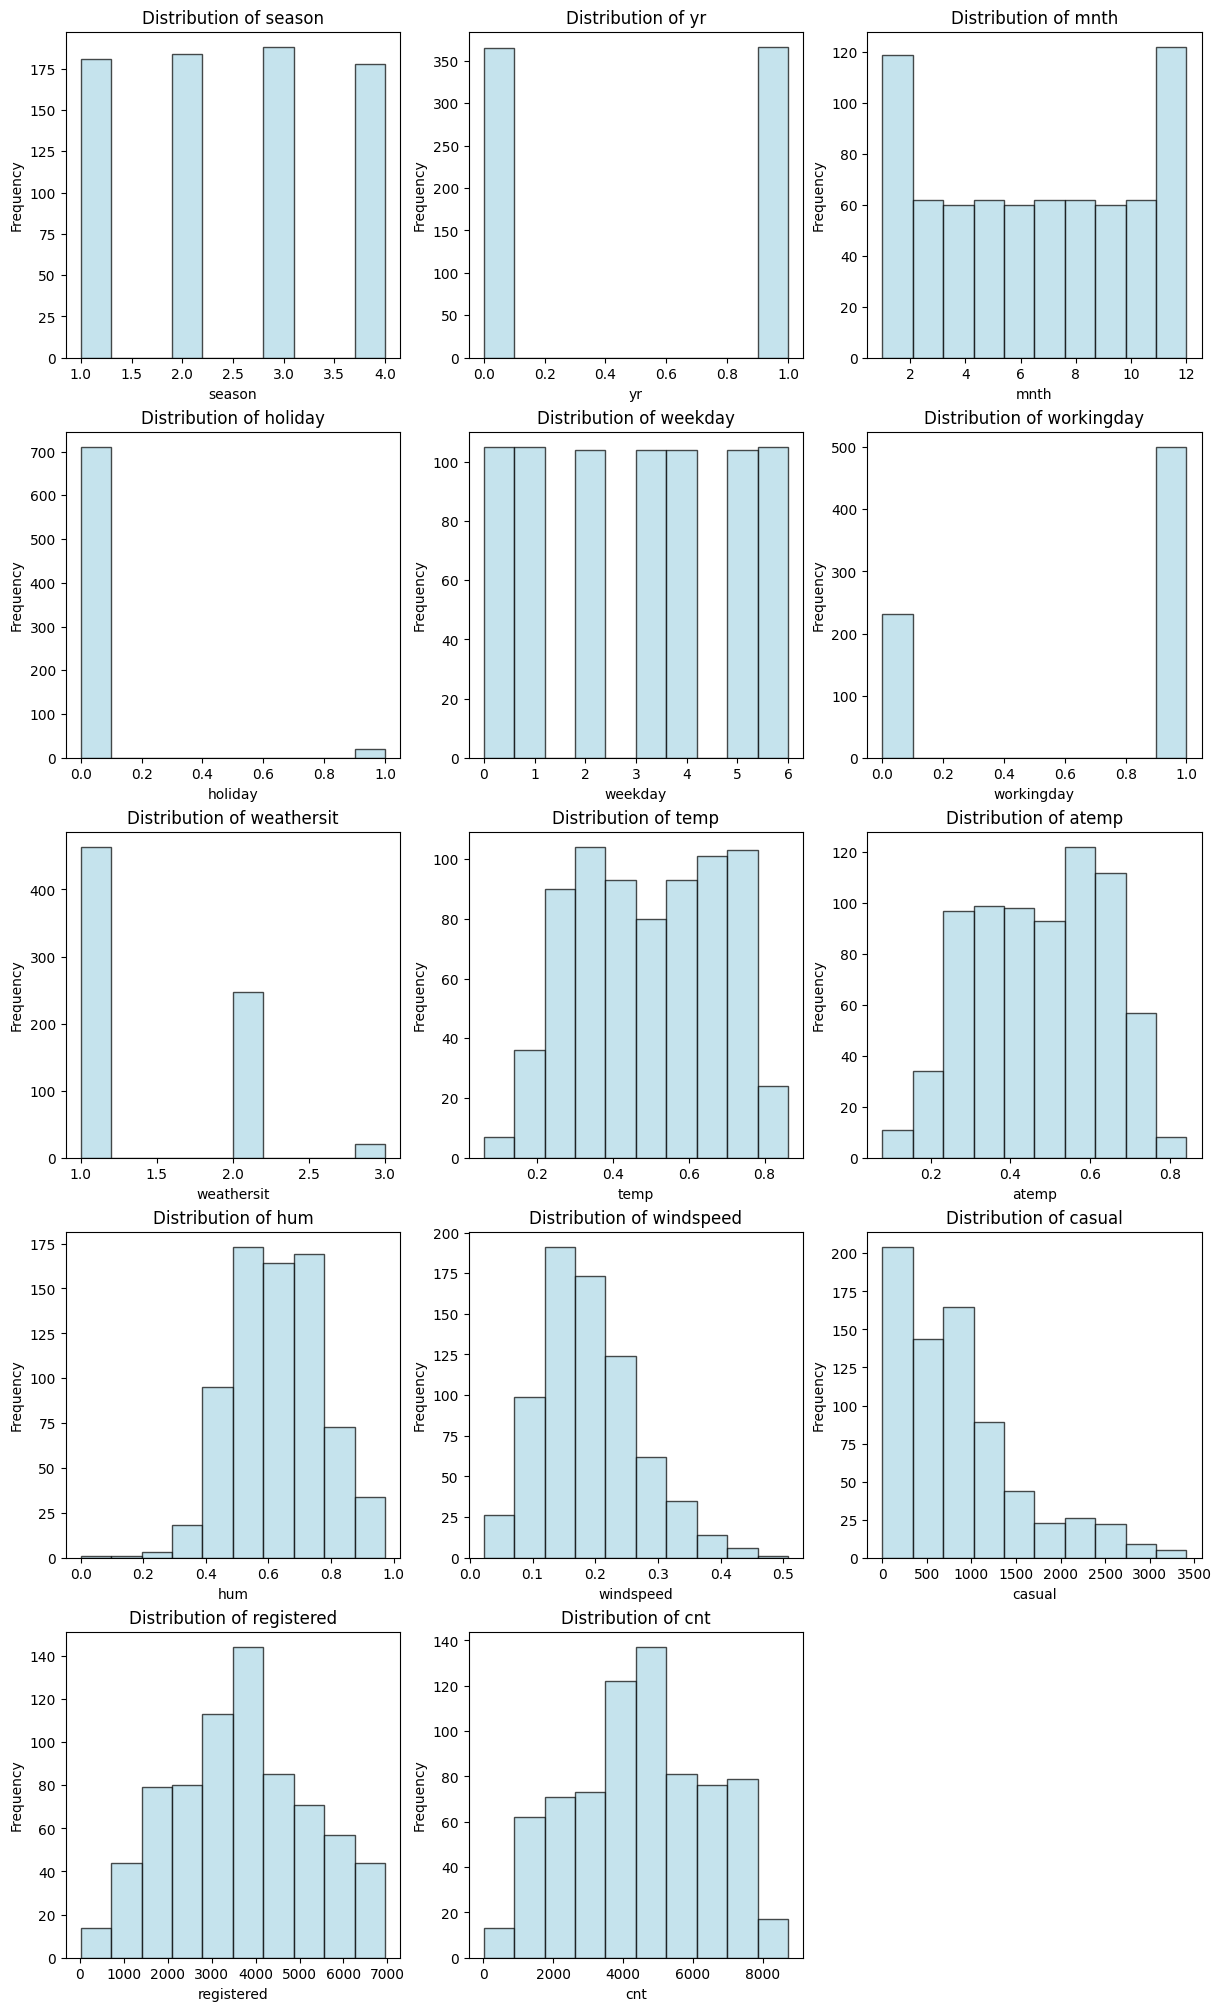

In [33]:
# Exclude the "instant" column
columns_to_plot = [col for col in day_df.columns if col != "instant"]

# Number of subplots
num_columns = len(columns_to_plot)
grid_cols = 3  # Number of columns in the grid
grid_rows = math.ceil(num_columns / grid_cols)  # Number of rows in the grid

fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(12, 4 * grid_rows), constrained_layout=True)

# Flatten the axes for easy indexing
axes = axes.flatten()

# Iterate over each column and create histogram and line graph
for i, col in enumerate(columns_to_plot):
    values, bins = np.histogram(day_df[col], bins=10)
    bin_centers = (bins[:-1] + bins[1:]) / 2  # Get bin centers for the line graph
    
    axes[i].hist(day_df[col], bins=10, color='lightblue', edgecolor='black', alpha=0.7, label='Histogram')
    axes[i].set_xlabel(f'{col}')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of {col}')

# Remove empty axes if the number of plots is less than grid slots
for i in range(num_columns, len(axes)):
    axes[i].remove()

# Show the grid of plots
plt.show()

**Insight:**
- data suhu, feels-like suhu, dan kelembapan terdistribusi normal dengan beberapa noise kecil
- data cuaca tidak terdistribusi dengan baik. tidak ada data yang memiliki cuaca 'heavy rain' pada dataset hour.csv

## Visualization & Explanatory Analysis

### Pertanyaan 1:

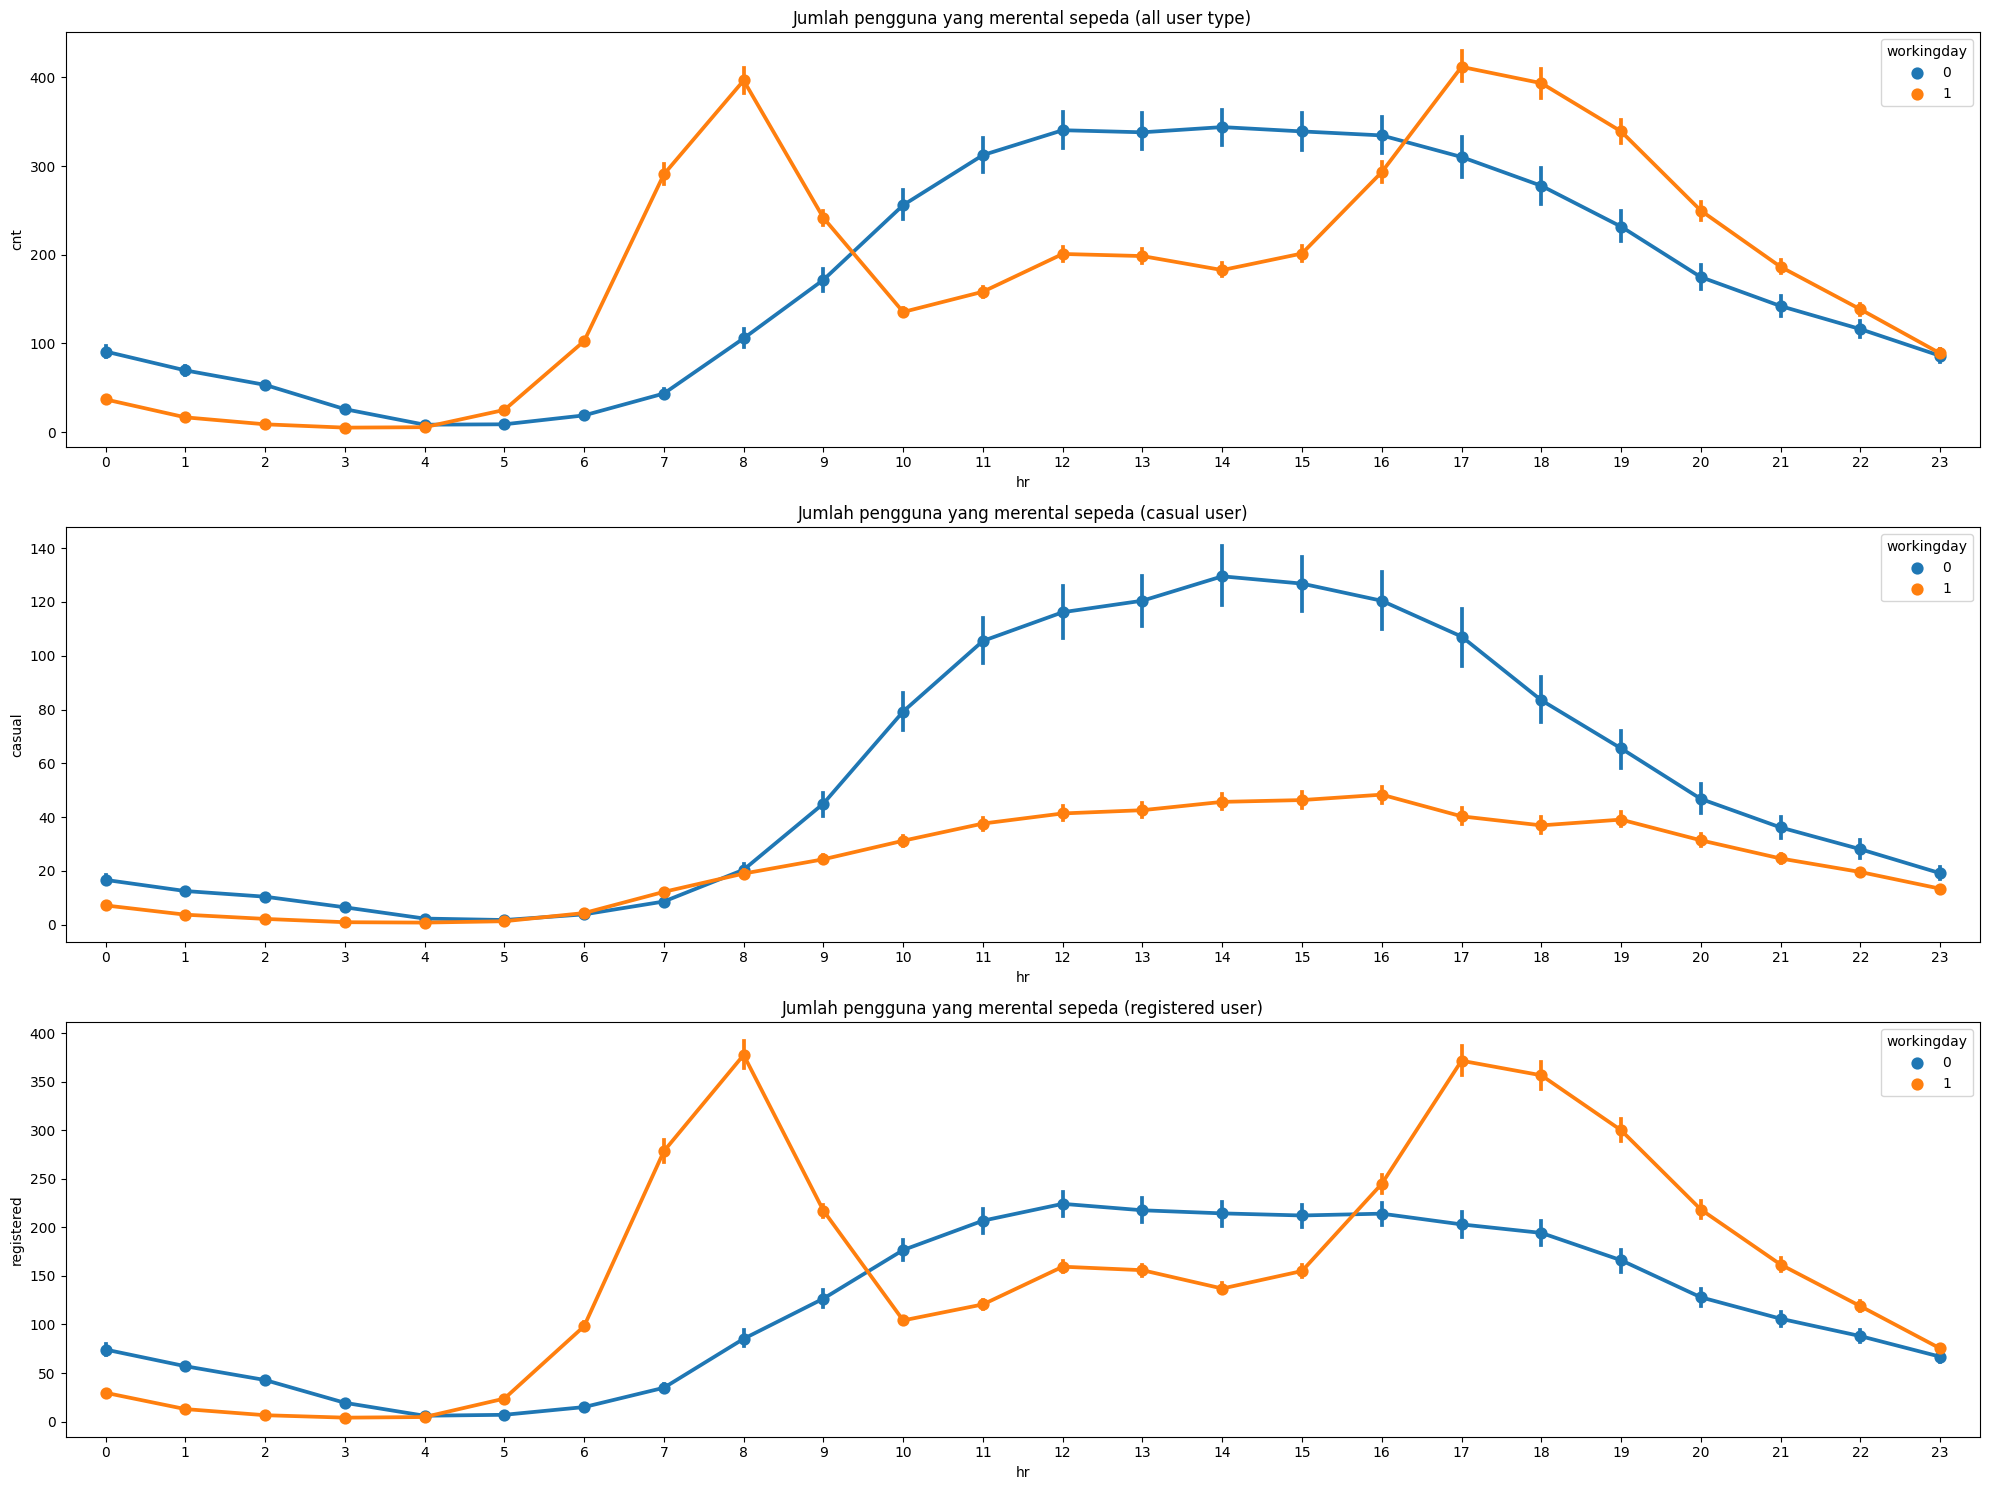

In [19]:
# Create a figure with 3 subplots arranged vertically
fig, axes = plt.subplots(3, 1, figsize=(20, 15))

# Plot for 'cnt'
sns.pointplot(data=hour_df_clean, x='hr', y='cnt', hue='workingday', ax=axes[0], estimator=np.mean)
axes[0].set(title='Jumlah pengguna yang merental sepeda (all user type)')

# Plot for 'casual'
sns.pointplot(data=hour_df_clean, x='hr', y='casual', hue='workingday', ax=axes[1], estimator=np.mean)
axes[1].set(title='Jumlah pengguna yang merental sepeda (casual user)')

# Plot for 'registered'
sns.pointplot(data=hour_df_clean, x='hr', y='registered', hue='workingday', ax=axes[2], estimator=np.mean)
axes[2].set(title='Jumlah pengguna yang merental sepeda (registered user)')

# Show the plots
plt.tight_layout()
plt.show()


**Insight:**
hubungan hari libur/weekend (workingday = 0) dengan jumlah pengguna penyewa sepeda:

1. Pola Waktu Penyewaan:
- Pada hari kerja (workingday = 1), terlihat ada 2 puncak yang jelas yaitu sekitar jam 7-8 pagi dan jam 17-18 sore, yang mencerminkan pola commuting (perjalanan ke dan dari tempat kerja)
- Pada hari libur (workingday = 0), pola penyewaan lebih merata sepanjang hari dengan puncak tunggal di siang hari (sekitar jam 13-15)

2. Jumlah Penyewa:
- Pada jam-jam puncak hari kerja (pagi dan sore), jumlah penyewa mencapai sekitar 400 orang
- Pada hari libur, jumlah penyewa maksimal sekitar 350 orang yang terjadi di siang hari
- Di malam hari dan dini hari (jam 0-5), jumlah penyewa relatif sama antara hari kerja dan libur, yaitu rendah

3. Karakteristik Penggunaan:
- Hari kerja menunjukkan penggunaan yang lebih terfokus untuk tujuan transportasi rutin (commuting)
- Hari libur menunjukkan penggunaan yang lebih santai dan rekreasional, terlihat dari distribusi yang lebih merata dan puncak di siang hari

4. Implikasi:
- Sistem penyewaan sepeda digunakan untuk dua tujuan berbeda: transportasi harian pada hari kerja dan rekreasi pada hari libur
- Meskipun puncak hari kerja lebih tinggi, hari libur memiliki distribusi penggunaan yang lebih merata dan berkelanjutan sepanjang hari


### Pertanyaan 2:

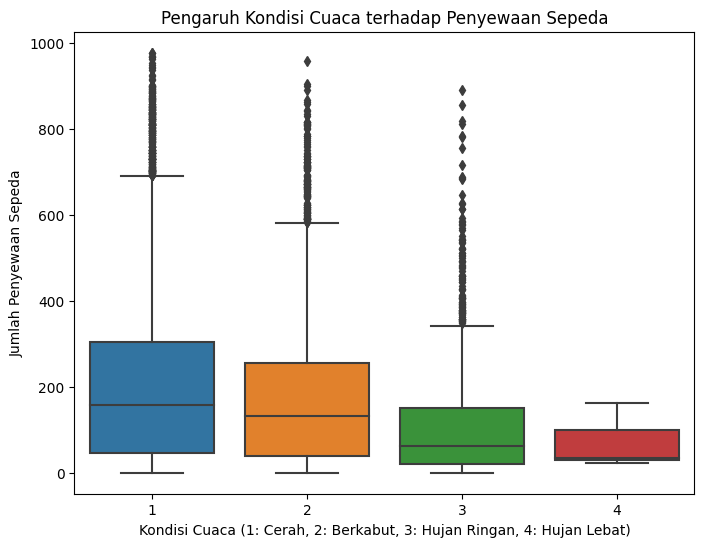

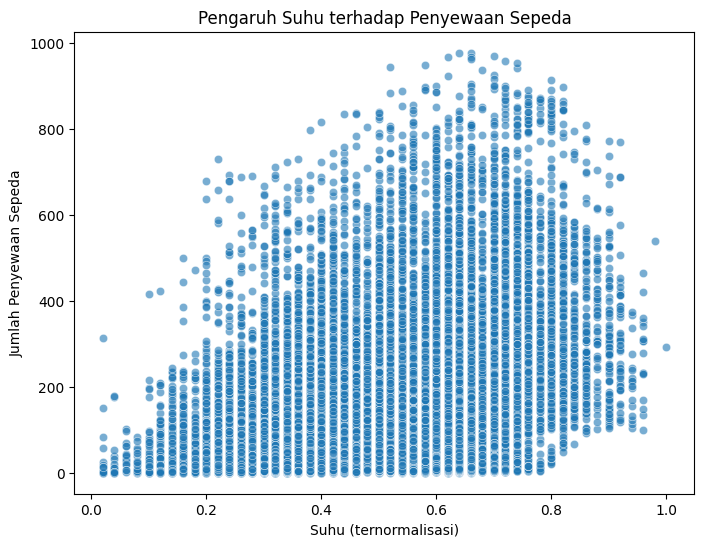

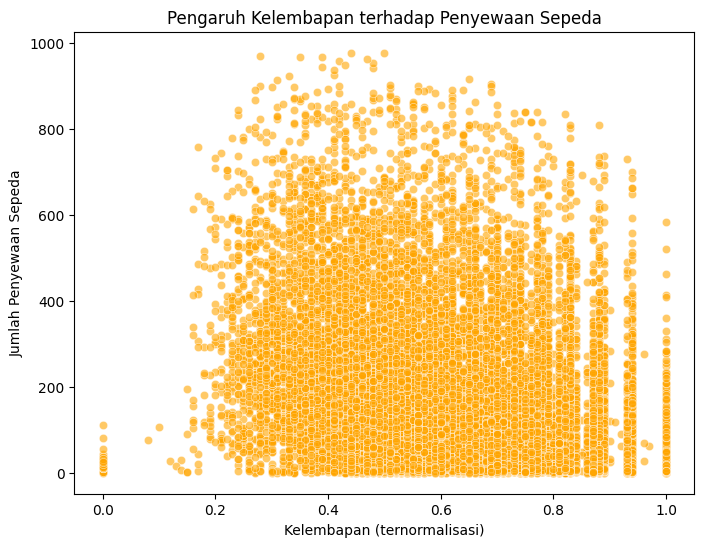

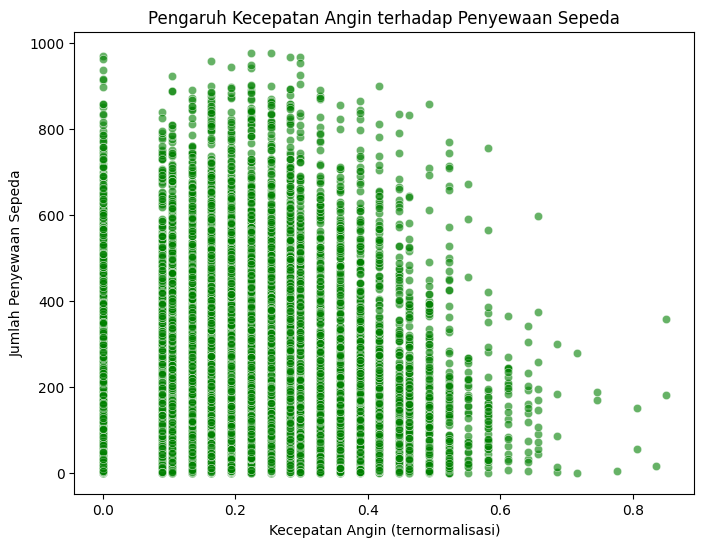

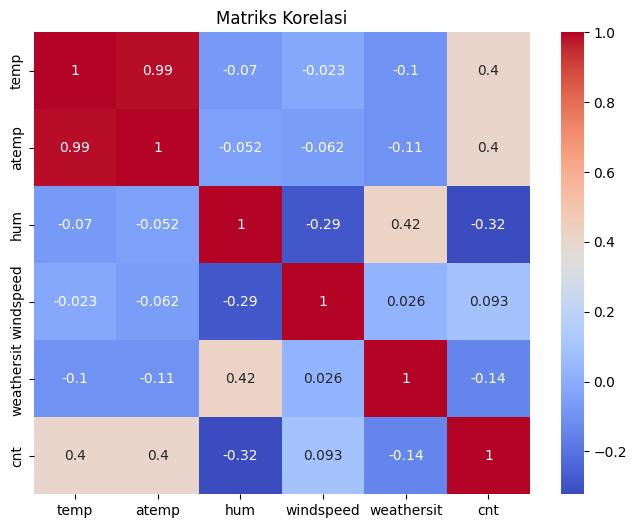

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Mengecek kolom yang relevan untuk analisis
relevant_columns = ['temp', 'atemp', 'hum', 'windspeed', 'weathersit', 'cnt']

# Analisis hubungan antara cuaca (weathersit) dengan jumlah penyewaan sepeda
plt.figure(figsize=(8, 6))
sns.boxplot(x='weathersit', y='cnt', data=hour_df)
plt.title('Pengaruh Kondisi Cuaca terhadap Penyewaan Sepeda')
plt.xlabel('Kondisi Cuaca (1: Cerah, 2: Berkabut, 3: Hujan Ringan, 4: Hujan Lebat)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

# Analisis hubungan antara suhu (temp) dengan jumlah penyewaan sepeda
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temp', y='cnt', data=hour_df, alpha=0.6)
plt.title('Pengaruh Suhu terhadap Penyewaan Sepeda')
plt.xlabel('Suhu (ternormalisasi)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

# Analisis hubungan antara kelembapan (hum) dengan jumlah penyewaan sepeda
plt.figure(figsize=(8, 6))
sns.scatterplot(x='hum', y='cnt', data=hour_df, alpha=0.6, color='orange')
plt.title('Pengaruh Kelembapan terhadap Penyewaan Sepeda')
plt.xlabel('Kelembapan (ternormalisasi)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

# Analisis hubungan antara kecepatan angin (windspeed) dengan jumlah penyewaan sepeda
plt.figure(figsize=(8, 6))
sns.scatterplot(x='windspeed', y='cnt', data=hour_df, alpha=0.6, color='green')
plt.title('Pengaruh Kecepatan Angin terhadap Penyewaan Sepeda')
plt.xlabel('Kecepatan Angin (ternormalisasi)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

# Analisis korelasi antara variabel lingkungan dengan jumlah penyewaan sepeda
correlation_matrix = hour_df[relevant_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()


**Insight:**
bagaimana cuaca mempengaruhi jumlah pengguna penyewa sepeda:

1. Kondisi Cuaca (Grafik 1):
   Jumlah penyewa tertinggi terjadi saat cuaca cerah, dengan median sekitar 150-200 penyewa
   Semakin buruk cuaca, semakin menurun jumlah penyewa
   Hujan lebat (kondisi 4) memiliki dampak paling signifikan dengan jumlah penyewa paling rendah, median hanya sekitar 50 penyewa
   Terdapat variasi yang cukup besar dalam setiap kondisi cuaca, ditunjukkan oleh panjangnya box plot

2. Pengaruh Suhu (Grafik 2):
   Terdapat korelasi positif yang jelas antara suhu dengan jumlah penyewa
   Jumlah penyewa meningkat seiring kenaikan suhu hingga mencapai puncak pada suhu sekitar 0.6-0.8 (ternormalisasi)
   Pada suhu sangat rendah (0-0.2) dan sangat tinggi (>0.8), jumlah penyewa cenderung menurun
   Penyebaran data menunjukkan variasi yang lebih besar pada suhu optimal

3. Pengaruh Kelembapan (Grafik 3):
   Terdapat hubungan negatif antara kelembapan dengan jumlah penyewa
   Kelembapan tinggi (>0.8) cenderung menghasilkan jumlah penyewa yang lebih rendah
   Penyebaran data paling besar terjadi pada kelembapan menengah (0.4-0.6)
   Kelembapan sangat rendah (<0.2) juga tidak optimal untuk penyewaan sepeda

4. Pengaruh Kecepatan Angin (Grafik 4):
   Terdapat korelasi negatif yang kuat antara kecepatan angin dengan jumlah penyewa
   Jumlah penyewa tertinggi terjadi saat kecepatan angin rendah (0-0.2)
   Semakin tinggi kecepatan angin, semakin sedikit jumlah penyewa
   Pada kecepatan angin tinggi (>0.6), jumlah penyewa sangat rendah



## Analisis Lanjutan (Opsional)

Untuk lebih mendapatkan gambaran bagaimana pengaruh cuaca kita kategorikan cuaca menjadi 4 kategori:

1. Kategori "Ideal"<br/>
    weathersit (situasi cuaca) harus = 1 (berarti cerah)<br/>
    temp (temperatur) harus > 0.6 (cukup hangat)<br/>
    hum (kelembaban) harus < 0.5 (tidak terlalu lembab)<br/>

2. Kategori "Good":<br/>
    weathersit harus 1 atau 2 (cerah atau berawan ringan)<br/>
    temp harus > 0.4 (cukup hangat tapi tidak sepanas kategori Ideal)<br/>
    hum harus < 0.7 (kelembaban sedang)<br/>

3. Kategori "Moderate":<br/>
    weathersit bisa 2 atau 3 (berawan ringan atau berawan berat)<br/>
    temp harus > 0.2 (hangat minimal)<br/>
    hum harus < 0.8 (kelembaban bisa lebih tinggi)<br/>

4. Kategori "Poor":<br/>
    Jika kondisi tidak memenuhi kriteria kategori manapun di atas, maka akan masuk kategori Poor

category
Poor        9060
Good        4775
Moderate    2002
Ideal       1542
Name: count, dtype: int64


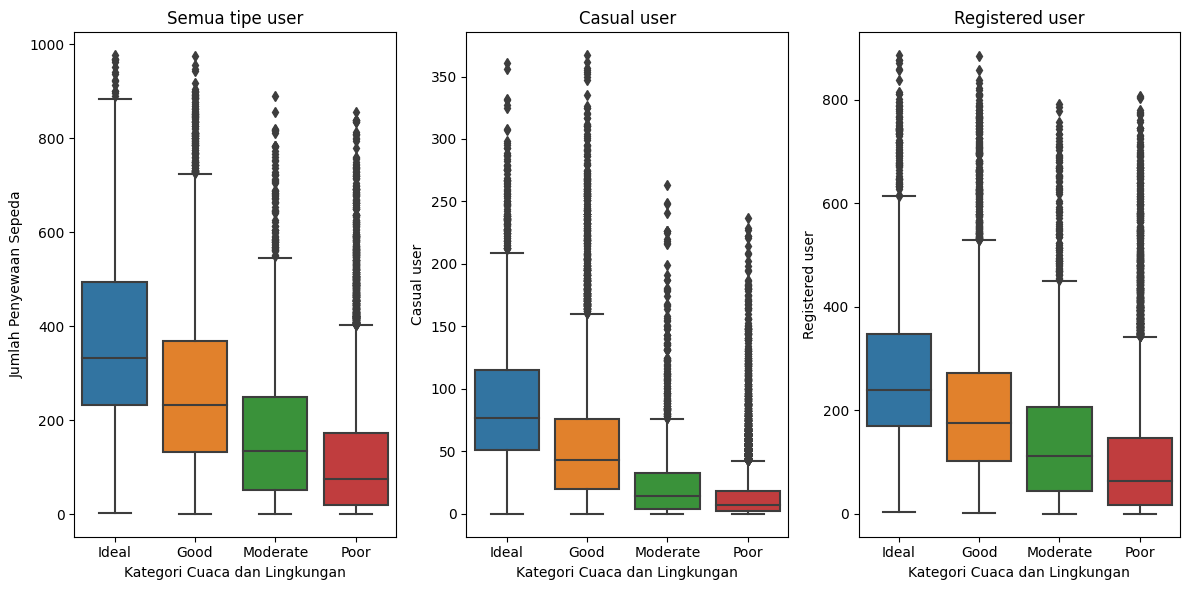

In [48]:
# Mengecek kolom yang relevan untuk analisis
relevant_columns = ['temp', 'atemp', 'hum', 'windspeed', 'weathersit', 'cnt']


# Membuat kategori berdasarkan nilai cuaca dan kondisi lingkungan
def categorize(row):
    if row['weathersit'] == 1 and row['temp'] > 0.6 and row['hum'] < 0.5:
        return 'Ideal'
    elif row['weathersit'] in [1, 2] and row['temp'] > 0.4 and row['hum'] < 0.7:
        return 'Good'
    elif row['weathersit'] in [2, 3] and row['temp'] > 0.2 and row['hum'] < 0.8:
        return 'Moderate'
    else:
        return 'Poor'

hour_df['category'] = hour_df.apply(categorize, axis=1)

# Distribusi kategori
print(hour_df['category'].value_counts())

# Analisis hubungan kategori dengan pengguna kasual dan terdaftar
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='category', y='cnt', data=hour_df, order=['Ideal', 'Good', 'Moderate', 'Poor'])
plt.title('Semua tipe user')
plt.xlabel('Kategori Cuaca dan Lingkungan')
plt.ylabel('Jumlah Penyewaan Sepeda')

plt.subplot(1, 3, 2)
sns.boxplot(x='category', y='casual', data=hour_df, order=['Ideal', 'Good', 'Moderate', 'Poor'])
plt.title('Casual user')
plt.xlabel('Kategori Cuaca dan Lingkungan')
plt.ylabel('Casual user')

plt.subplot(1, 3, 3)
sns.boxplot(x='category', y='registered', data=hour_df, order=['Ideal', 'Good', 'Moderate', 'Poor'])
plt.title('Registered user')
plt.xlabel('Kategori Cuaca dan Lingkungan')
plt.ylabel('Registered user')

plt.tight_layout()
plt.show()


# Kesimpulan berdasarkan kategori dan visualisasi


## Conclusion

- Hari libur/weekend memiliki pengaruh signifikan terhadap pola penggunaan sepeda sewaan, baik dari segi waktu penggunaan maupun jumlah penyewa. Pola penggunaan berubah dari fokus commuting pada hari kerja menjadi lebih rekreasional pada hari libur.
- Cuaca memiliki pengaruh yang sangat signifikan terhadap jumlah penyewa sepeda. Kondisi cuaca yang memiliki pengguna penyewaan sepeda terbaik adalah saat cuaca Ideal: Cuaca cerah, Suhu sedang menuju hangat (tidak terlalu dingin atau terlalu panas), Kelembapan menengah ke rendah, Kecepatan angin rendah